# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# H_0 = Your null hypothesis
# H₀: The new template's response rate is less than or equal to the current template's rate of 5%
# Mathematically, H₀: p_new ≤ p_old
# In this case, p_old = 0.05 (current response rate)

p_old = 0.05  # Current response rate
p_new = p_old  # We assume no increase in response rate in the null hypothesis


## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [2]:
# H_1 = Your alternative hypothesis
# H₁: The new template's response rate is greater than the current template's rate of 5%
# Mathematically, H₁: p_new > p_old
# In this case, we want to detect at least a 1% increase, so p_new ≥ 0.06

p_old = 0.05  # Current response rate
p_new = 0.06  # Desired increased response rate


## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [5]:
from statsmodels.stats.power import TTestIndPower

# Given values
p_old = 0.05  # current response rate
p_new = 0.06  # expected new response rate with 1% increase
std_dev = 0.0475  # standard deviation of response rate

# Calculate the effect size (Cohen's d)
effect_size = (p_new - p_old) / std_dev
effect_size

0.2105263157894736

In [6]:
# Define parameters
alpha = 0.05
power = 0.8

# Initialize power analysis object
power_analysis = TTestIndPower()

# Calculate sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

# Print the result with the descriptive message
print(f"The required sample size to detect a 1% increase in the response rate, "
      f"with a significance level of 0.05 and a power of 0.8, "
      f"is approximately {round(sample_size)} individuals per group (i.e., for the new email template group).")


The required sample size to detect a 1% increase in the response rate, with a significance level of 0.05 and a power of 0.8, is approximately 280 individuals per group (i.e., for the new email template group).


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [10]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Initialize power analysis object
power_analysis = TTestIndPower()

# Given values
p_old = 0.05  # current response rate
std_dev = 0.0475  # standard deviation of response rate
power = 0.8  # power threshold

# Define alpha values and response rate differences to explore
alpha_values = [0.01, 0.05, 0.1]
response_diffs = [0.005, 0.01, 0.02, 0.03]

# Sample sizes to check (we'll calculate for a range of values)
sample_sizes = np.arange(50, 1000, 50)
sample_sizes




array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])

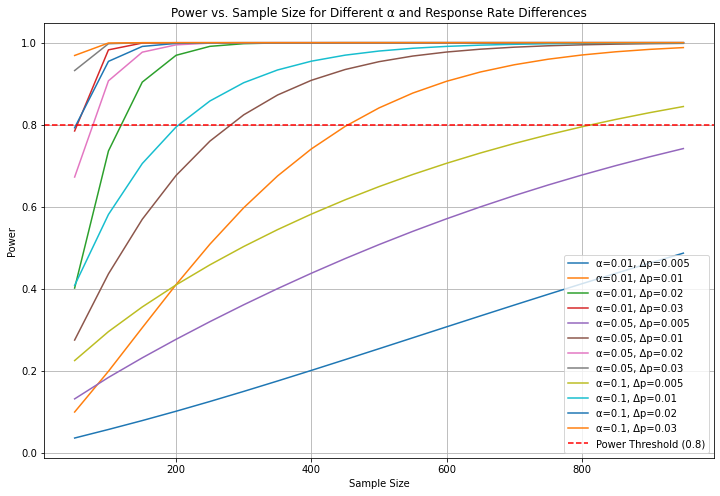

In [12]:
# Create a figure for the plots
plt.figure(figsize=(12, 8))

# Loop through each alpha value
for alpha in alpha_values:
    for response_diff in response_diffs:
        # Calculate the effect size (Cohen's d)
        p_new = p_old + response_diff
        effect_size = (p_new - p_old) / std_dev
        
        # Calculate the power for each sample size
        powers = [power_analysis.power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='larger') for n in sample_sizes]
        
        # Plot the power vs sample size
        plt.plot(sample_sizes, powers, label=f'α={alpha}, Δp={response_diff}')

# Add labels and title
plt.title('Power vs. Sample Size for Different α and Response Rate Differences')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.axhline(y=power, color='r', linestyle='--', label='Power Threshold (0.8)')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.show()




## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Final Experimental Design Proposal:

#### Objective:
The goal of this experiment is to evaluate whether a new email template can improve the response rate by 1% or more compared to the current template, which has a response rate of 5%. The experiment aims to validate whether this difference is statistically significant.

---

### Key Elements of the Design:

1. **Hypotheses**:
   - **Null Hypothesis (H₀):** The new email template will not outperform the current one; the response rate for the new template will be equal to or less than the current response rate of 5%.
   - **Alternative Hypothesis (H₁):** The new email template will outperform the current one, increasing the response rate to at least 6%.

2. **Significance Level (\(\alpha\)):**
   - We propose using a **significance level of 0.05**. This gives us a 5% chance of falsely rejecting the null hypothesis (Type I error), a standard threshold for business experiments.

3. **Power (\(1 - \beta\)):**
   - We will aim for a **power of 0.8 (80%)**, which ensures an 80% chance of detecting the desired 1% increase in response rate, reducing the risk of Type II errors (failing to detect a real effect).

4. **Sample Size:**
   - Based on previous calculations, the required sample size to detect a 1% increase with \(\alpha = 0.05\) and power of 0.8 is **approximately 280 recipients per group**.
     - **Control group**: 280 recipients will receive the current email template.
     - **Experimental group**: 280 recipients will receive the new email template.

5. **Response Rate Differences:**
   - We are particularly interested in detecting a response rate increase of **1%** (from 5% to 6%). However, we also explored how larger response rate differences (e.g., 2% or 3%) would affect the required sample size and power. This experiment will be optimized for detecting the 1% difference.

6. **Randomization:**
   - Participants will be randomly assigned to either the control group (current template) or the experimental group (new template). This ensures that any differences in response rates are due to the template itself and not external factors.

7. **Duration of the Experiment:**
   - The experiment will continue until we have obtained at least **280 participants per group**. Depending on the daily or weekly email capacity, the total duration will vary, but should be sufficient to reach the required sample size.

8. **Metrics Tracked:**
   - The primary metric is the **response rate**, which will be measured as the proportion of recipients who respond to the email out of the total number sent.
   - Both the **conversion rate** and any follow-up actions from the respondents will also be tracked to provide more insights into the behavior of the groups.

---

### Advantages of this Design:

1. **Statistical Power and Precision:**
   - The design with **280 recipients per group** is optimized to detect a **1% increase in response rate**. A power of 0.8 ensures a strong chance of identifying a true effect, balancing business resources with statistical rigor.

2. **Balanced Significance Threshold:**
   - **\(\alpha = 0.05\)** is a commonly accepted level for business decisions. It reduces the risk of Type I errors while providing a reasonable standard for making actionable conclusions.

3. **Resource Efficiency:**
   - This design requires a **manageable sample size** that should fit within the company’s capacity to run without taking excessive time or resources. The number of recipients (560 total) strikes a balance between ensuring reliable results and keeping costs low.

4. **Actionable Results:**
   - The clear setup of control and experimental groups, along with the tracked response rates, ensures that the company will have actionable insights into whether the new template improves engagement.

---

### Disadvantages of this Design:

1. **Potential Miss of Smaller Effects:**
   - The current design is powered to detect a 1% improvement in response rate. If the true increase is smaller (e.g., 0.5%), this experiment may not have enough power to detect it, leading to a false negative.

2. **Risk of Sales Loss:**
   - If the new template performs worse than the current one, there is a **risk of losing potential sales** during the experiment period. However, limiting exposure to just 280 recipients in the experimental group minimizes the damage.

3. **Assumptions on Standard Deviation:**
   - The sample size calculation assumes the standard deviation of the response rate will remain close to the provided value of 0.0475. If this assumption is incorrect, the experiment may need adjustments to sample size or duration.

---

### Conclusion:
This experimental design is robust, balancing statistical requirements with practical business constraints. It allows for the detection of a meaningful improvement in response rate with an appropriate level of statistical confidence. While it is optimized for detecting a 1% increase, the design could be scaled if larger improvements are observed, or adjusted for more stringent requirements.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.